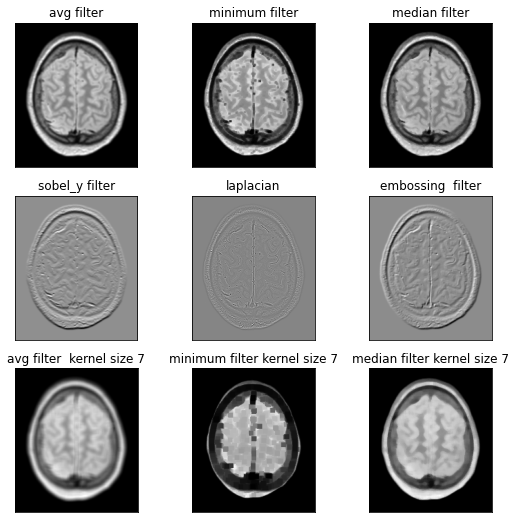

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

def filtering(img , filter_name , kernel_size):
  if ( kernel_size % 2 != 0):    # check if odd
    margin = int((kernel_size-1)/2)
    img = np.pad(img, margin, 'symmetric') 
    m, n = img.shape
    img_new1 = np.zeros([m, n])
    down =-margin
    up = margin

    if (filter_name == "averaging"):
      mask = np.ones([kernel_size, kernel_size], dtype = int)
      mask = mask / kernel_size**2
      for i in range(1, m-margin):
        for j in range(1, n-margin):
          sum = 0
          for x in range(down,up+1):
            for y in range(down,up+1):
              sum += (img[i+x, j+y]*mask[up+x, up+y])
          img_new1[i, j]= sum
      
    if (filter_name == "minimum"):
      for i in range(1, m-up):
        for j in range(1, n-up):
          temp =[]
          for x in range(down,up+1):
            for y in range(down,up+1):
              temp.append(img[i+x, j+y])
          
          img_new1[i, j]= min(temp)
    if (filter_name == "median"):
      for i in range(1, m-margin):
        for j in range(1, n-margin):
          temp =[]
          for x in range(down,up+1):
            for y in range(down,up+1):
              temp.append(img[i+x, j+y])
          temp = sorted(temp)
          img_new1[i, j]= temp[int(np.round((kernel_size**2-1)/2))]
      
    if (filter_name == "sobel_y" ):
      if (kernel_size == 3):
        mask = np.array([[-1., -2. , -1.],[ 0. ,  0. ,  0. ],[ 1., 2. ,  1.]])
        
        for i in range(1, m-margin):
          for j in range(1, n-margin):
            sum = 0
            for x in range(down,up+1):
              for y in range(down,up+1):
                sum += (img[i+x, j+y]*mask[up+x, up+y])
            img_new1[i, j]= sum

    if (filter_name == "laplacian" ):
      if (kernel_size == 3):
        mask = np.array([[0, -1 , 0],[-1 , 4 , -1],[0 , -1 , 0]])
        for i in range(1, m-margin):
          for j in range(1, n-margin):
            sum = 0
            for x in range(down,up+1):
              for y in range(down,up+1):
                sum += (img[i+x, j+y]*mask[up+x, up+y])
            img_new1[i, j]= sum
    if (filter_name == "embossing"):
      if (kernel_size == 3):
        mask = np.array([[-1, -1 , 0],[-1 , 0. , 1],[0 , 1 , 1]])
        for i in range(1, m-margin):
          for j in range(1, n-margin):
            sum = 0
            for x in range(down,up+1):
              for y in range(down,up+1):
                sum += (img[i+x, j+y]*mask[up+x, up+y])
            img_new1[i, j]= sum
  
  return img_new1.astype(np.float64)


img = cv2.imread('/content/MRI.png', 0)
plt.figure(figsize=(9,9))
plt.subplot(331),plt.imshow(filtering(img,'averaging',3),cmap='gray'),plt.title('avg filter')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(filtering(img,'minimum',3),cmap='gray'),plt.title('minimum filter')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(filtering(img,'median',3),cmap='gray'),plt.title('median filter')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(filtering(img,'sobel_y',3),cmap='gray'),plt.title('sobel_y filter')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(filtering(img,'laplacian',3),cmap='gray'),plt.title('laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(filtering(img,'embossing',3),cmap='gray'),plt.title('embossing  filter')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(filtering(img,'averaging',7),cmap='gray'),plt.title('avg filter  kernel size 7')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(filtering(img,'minimum',7),cmap='gray'),plt.title('minimum filter kernel size 7')
plt.xticks([]), plt.yticks([])
plt.subplot(339),plt.imshow(filtering(img,'median',7),cmap='gray'),plt.title('median filter kernel size 7')
plt.xticks([]), plt.yticks([])
plt.show()